In [1]:
library(dplyr)
library(tidymodels)
library(vip)
library(keras)
library(caret)
library(tensorflow)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidym

In [2]:
raw_data<-readRDS("TSresponse_clean.RDS")

In [3]:
raw_data

dateTimeSample,fishNum,spCode,totalLength,forkLength,weight,girth,dorsoLatHeight,clipTag,sex,⋯,F166.5,F167,F167.5,F168,F168.5,F169,F169.5,F170,Region,species
<dttm>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-33.98954,-34.71069,-35.47591,-36.11846,-36.57586,-36.90389,-37.16360,-37.37286,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-49.75377,-43.36868,-39.93659,-38.22149,-37.75096,-38.21294,-39.35730,-41.04031,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-45.48378,-46.41323,-46.20443,-46.10777,-47.79635,-51.34248,-52.21717,-51.22738,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-42.36388,-42.79280,-43.24235,-43.47555,-44.25610,-46.26738,-49.37243,-51.95134,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-36.12024,-36.28219,-36.87755,-37.58748,-38.33421,-38.65026,-37.10683,-34.48625,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-32.66965,-32.60390,-32.43916,-32.96681,-35.13315,-39.78136,-46.17297,-44.42698,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-46.83981,-48.26073,-48.73601,-46.82269,-44.71505,-44.26200,-45.54696,-48.31731,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-48.55686,-57.49871,-48.56347,-43.80375,-41.95260,-41.66501,-42.73266,-45.96766,LT009.Region_1,LT
26-07-20 04:56:02,LT009,81,521,474,1132,236,49,N,2,⋯,-49.22816,-42.07251,-35.43637,-31.48083,-29.72450,-29.86794,-31.79124,-35.66754,LT009.Region_1,LT


In [4]:
data_long<-gather(raw_data,frequency,TS,F45:F170)
data_long$frequency<-as.numeric(gsub('F','',data_long$frequency))

In [9]:
# This doesn't finish

# ggplot(data_long)+
#   geom_line(aes(x=frequency,y=TS),alpha=0.1,linewidth=0.5)+
#   theme_bw()+
#   ylab("Target Strength")+
#   facet_wrap(~species)

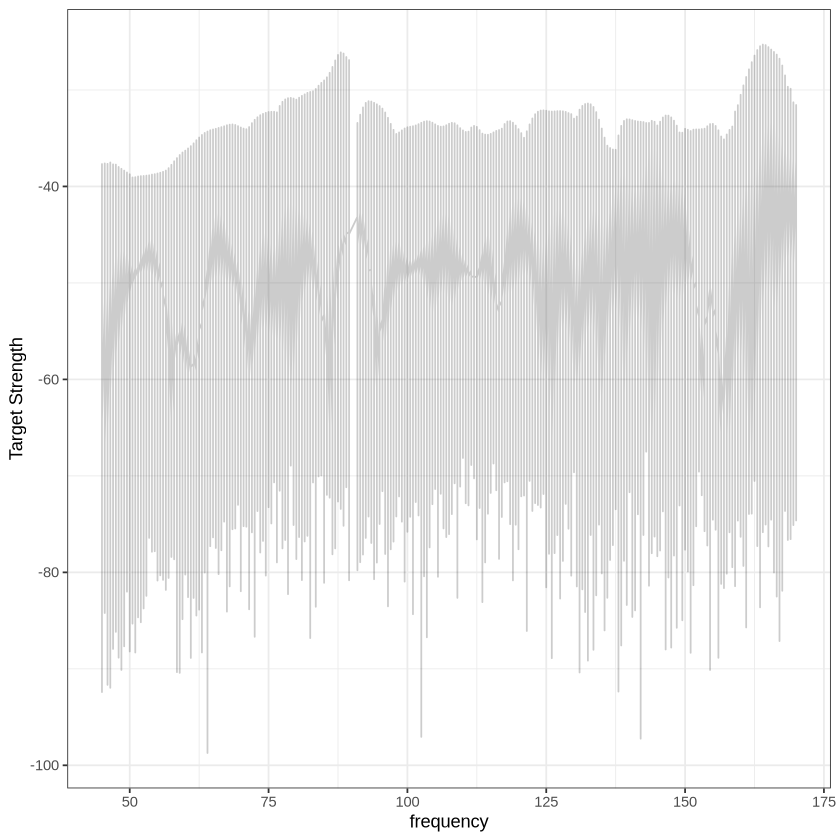

In [5]:
data_long%>%
  filter(fishNum=="LT009")%>%
  ggplot()+
  geom_line(aes(x=frequency,y=TS),alpha=0.2,linewidth=0.5)+
  theme_bw()+
  ylab("Target Strength")

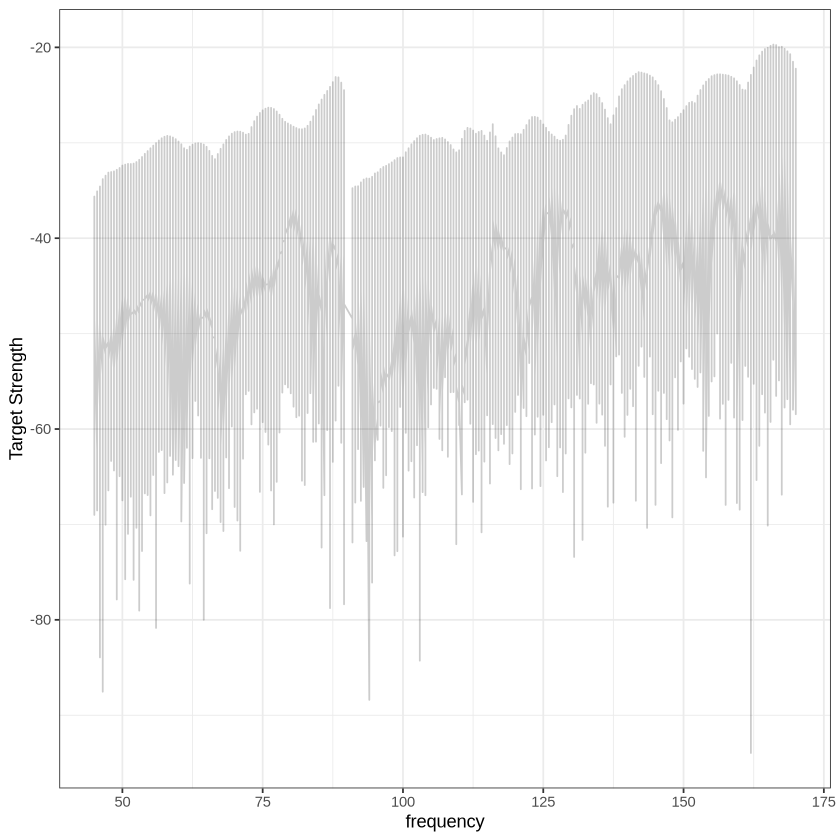

In [6]:
data_long%>%
  filter(fishNum=="SMB010")%>%
  ggplot()+
  geom_line(aes(x=frequency,y=TS),alpha=0.2,linewidth=0.5)+
  theme_bw()+
  ylab("Target Strength")

`summarise()` has grouped output by 'species'. You can override using the
`.groups` argument.


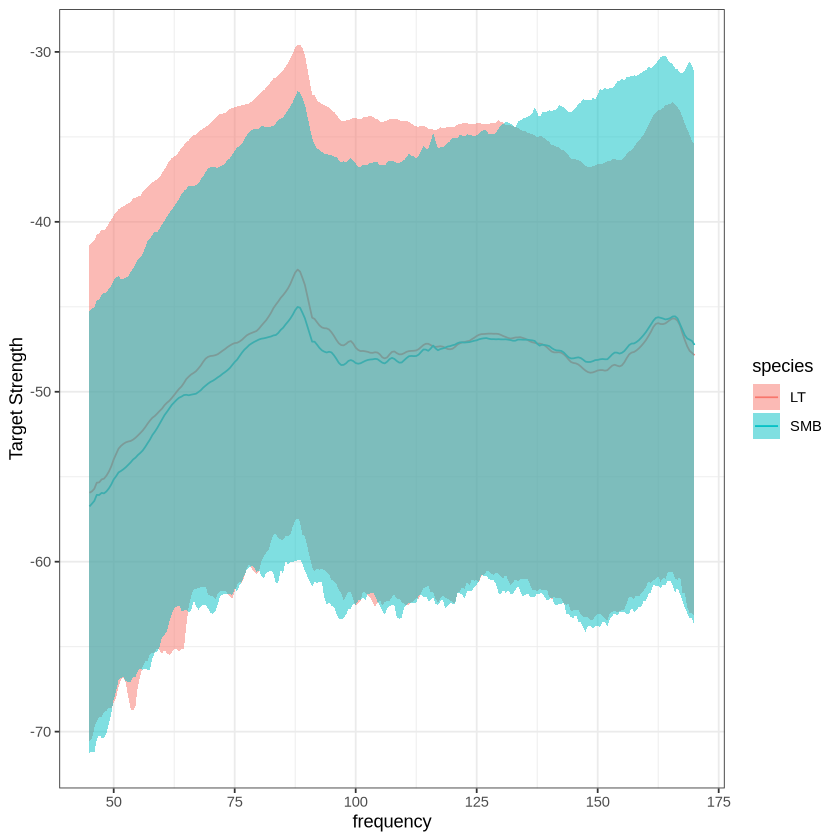

In [7]:
data_long%>%
  group_by(species,frequency)%>%
  summarise(meanTS=mean(TS),upper95=quantile(TS,0.975),lower95=quantile(TS,0.025))%>%
  ggplot()+
  geom_line(aes(x=frequency,y=meanTS,col=species))+
  geom_ribbon(aes(x=frequency,ymin=lower95,ymax=upper95,group=species,fill=species),alpha=0.5)+
  theme_bw()+
  ylab("Target Strength")

In [8]:
set.seed(73)
# first split for training & validating/testing
split<-group_initial_split(raw_data,group=fishNum,strata = species, prop=0.8)
train<-training(split)
val_test<-testing(split)
# second split for validating and testing
split2<-group_initial_split(val_test,group=fishNum,strata = species, prop=0.5)
validate<-training(split2)
test<-testing(split2)

Select the frequency data, plus region, species and individual length for each dataset. Then, standardise the TS to a fish of length 450mm and transform to acoustic backscatter

## Look at the number of pings per species in each dataset

In [ ]:
train%>%group_by(species)%>%dplyr::count()
validate%>%group_by(species)%>%dplyr::count()
test%>%group_by(species)%>%dplyr::count()

## Select the frequency data, plus region, species and individual length for each dataset. Then, standardise the TS to a fish of length 450mm and transform to acoustic backscatter

In [11]:
train<-train%>%select(F45:F170,Region,species,totalLength)
train[,1:249]<-exp((train[,1:249]+10*log10(450/train$totalLength))/10)

validate<-validate%>%select(F45:F170,Region,species,totalLength)
validate[,1:249]<-exp((validate[,1:249]+10*log10(450/validate$totalLength))/10)

test<-test%>%select(F45:F170,Region,species,totalLength)
test[,1:249]<-exp((test[,1:249]+10*log10(450/test$totalLength))/10)

In [12]:
head(train)
head(validate)
head(test)

F45,F45.5,F46,F46.5,F47,F47.5,F48,F48.5,F49,F49.5,⋯,F167,F167.5,F168,F168.5,F169,F169.5,F170,Region,species,totalLength
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
0.005465134,0.0052194711,0.005433992,0.006213429,0.007000389,0.007877444,0.008414946,0.008747122,0.008800682,0.008568469,⋯,0.029167675,0.027018977,0.025337463,0.02420463,0.023423532,0.022823022,0.022350392,LT009.Region_1,LT,521
0.005236951,0.0059024167,0.006880127,0.007853577,0.008116782,0.008020324,0.007492222,0.007113908,0.007118091,0.007452946,⋯,0.012271282,0.017295924,0.020531935,0.02152111,0.020549481,0.018327454,0.015488515,LT009.Region_1,LT,521
0.005197770,0.0035653605,0.002361520,0.002298127,0.003254024,0.004318585,0.004953163,0.005260766,0.005331112,0.005267801,⋯,0.009050387,0.009241346,0.009331097,0.00788132,0.005528312,0.005065296,0.005592308,LT009.Region_1,LT,521
0.004542422,0.0052019386,0.005401446,0.005248853,0.004503711,0.003518477,0.002274380,0.001197904,0.001716670,0.002981096,⋯,0.012998704,0.012427299,0.012140836,0.01122922,0.009183351,0.006732100,0.005201754,LT009.Region_1,LT,521
0.002530904,0.0007733289,0.001321636,0.003090695,0.004478193,0.005458212,0.005840145,0.005914224,0.005788878,0.005575708,⋯,0.024925996,0.023485299,0.021875817,0.02030179,0.019670186,0.022952968,0.029829710,LT009.Region_1,LT,521
0.006442193,0.0061490929,0.005376829,0.004293442,0.002880152,0.002450548,0.003614047,0.005058544,0.006271750,0.007150165,⋯,0.036007962,0.036606055,0.034724628,0.02796113,0.017566502,0.009270457,0.011038977,LT009.Region_1,LT,521


F45,F45.5,F46,F46.5,F47,F47.5,F48,F48.5,F49,F49.5,⋯,F167,F167.5,F168,F168.5,F169,F169.5,F170,Region,species,totalLength
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
0.021636571,0.022328913,0.022866672,0.023680866,0.02354664,0.023861610,0.023899838,0.024269592,0.024692422,0.025077512,⋯,0.047505106,0.045663660,0.043293794,0.040912768,0.038802186,0.036741298,0.033868839,LT23004.Region_1,LT,563
0.028108901,0.028169400,0.027655112,0.027329112,0.02600562,0.025384440,0.024750562,0.024867492,0.025469865,0.026457435,⋯,0.038495687,0.036596844,0.034911033,0.033488935,0.032129885,0.030517497,0.028489175,LT23004.Region_1,LT,563
0.023629943,0.024431141,0.024773836,0.025161521,0.02435049,0.023770835,0.022777999,0.022148381,0.021588477,0.021028831,⋯,0.003549252,0.001912921,0.001440980,0.002934726,0.004897842,0.006589235,0.007035201,LT23004.Region_1,LT,563
0.039835107,0.040156471,0.038883438,0.037988121,0.03649497,0.036571151,0.036511420,0.036922422,0.037231162,0.037609177,⋯,0.038167272,0.033781097,0.029247781,0.024585379,0.019755515,0.015038415,0.011400437,LT23004.Region_1,LT,563
0.015601572,0.015774243,0.015494230,0.015464220,0.01499841,0.014651021,0.013775703,0.013027364,0.012686205,0.013098753,⋯,0.007161008,0.005817080,0.004492981,0.002871461,0.000721663,0.003479544,0.006745875,LT23004.Region_1,LT,563
0.009458264,0.009519578,0.009381698,0.009243245,0.00867237,0.008236694,0.007684602,0.007288028,0.007078027,0.007154192,⋯,0.029515546,0.026807929,0.024227087,0.022261628,0.021024602,0.020216085,0.019294931,LT23004.Region_1,LT,563


F45,F45.5,F46,F46.5,F47,F47.5,F48,F48.5,F49,F49.5,⋯,F167,F167.5,F168,F168.5,F169,F169.5,F170,Region,species,totalLength
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
0.0041052115,0.004317633,0.004301163,0.004310622,0.004199854,0.004320168,0.004657717,0.005269203,0.005927684,0.006458464,⋯,0.00897193,0.009190121,0.005564543,0.002948090,0.010229993,0.014478730,0.015246265,LT010.Region_1,LT,532
0.0027093831,0.003597991,0.004421063,0.005093668,0.005334841,0.005533596,0.005573544,0.005583560,0.005518120,0.005421148,⋯,0.01045226,0.006984454,0.007137284,0.009294227,0.010995872,0.011492122,0.010466117,LT010.Region_1,LT,532
0.0058258981,0.005683575,0.005722949,0.005855307,0.005613090,0.005190772,0.004337082,0.003271704,0.002500361,0.003189335,⋯,0.01597181,0.015755636,0.018281203,0.020041146,0.019495935,0.016754525,0.012814681,LT010.Region_1,LT,532
0.0016537791,0.001044424,0.001943975,0.003337111,0.004412253,0.005113611,0.005228991,0.005020396,0.004699821,0.004542374,⋯,0.01131480,0.008827994,0.005668929,0.006408211,0.005614929,0.002137191,0.005768871,LT010.Region_1,LT,532
0.0005975149,0.001630913,0.002262046,0.002628936,0.002690429,0.002621619,0.002414484,0.002415452,0.002880431,0.003701496,⋯,0.01381717,0.013525160,0.017887379,0.021632248,0.020690984,0.015877266,0.012010144,LT010.Region_1,LT,532
0.0013810841,0.001336332,0.001938058,0.002269560,0.002185622,0.001682080,0.001060432,0.002049066,0.003581887,0.005026852,⋯,0.01440329,0.013501101,0.010417427,0.006228036,0.002689251,0.003350148,0.004932101,LT010.Region_14,LT,532


RNNs sre typically used for sequential data or timeseries data. Their input is a sequence of values over time. Our input is going to be a sequence of 5 pings, and the acoustic backscatter value at each frequency (i.e a 5 x 249 matrix).


Echoview (the software used to process our data) groups temporally and spatially close pings into a fish region. We are going to use these to group our data. 


Training Data
Creating a listing variable within each group so that we can split groups longer than 5 into groups of 5

In [14]:
train_grps<-train%>%group_by(Region)%>%mutate(grp=rep(1:ceiling(n()/5), each=5, length.out=n()))%>%ungroup()
head(train_grps)

# splitting into lists 
listgrps_train<-train_grps%>%group_split(Region,grp)

# keeping only lists that are of length 5
listgrps_train<-listgrps_train[sapply(listgrps_train, nrow) >= 5]

# Keeping only the frequency data
listgrps_train2<-map(listgrps_train, ~ (.x %>% select(1:249)))

# each dataframe in the list to a matrix
x_data_train<-lapply(listgrps_train2, as.matrix)

# Flatten into a 3D array
# x_data_train<-lm2a(x_data_train,dim.order=c(3,1,2))

# Check dims
dim(x_data_train)

F45,F45.5,F46,F46.5,F47,F47.5,F48,F48.5,F49,F49.5,⋯,F167.5,F168,F168.5,F169,F169.5,F170,Region,species,totalLength,grp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<int>
0.005465134,0.0052194711,0.005433992,0.006213429,0.007000389,0.007877444,0.008414946,0.008747122,0.008800682,0.008568469,⋯,0.027018977,0.025337463,0.02420463,0.023423532,0.022823022,0.022350392,LT009.Region_1,LT,521,1
0.005236951,0.0059024167,0.006880127,0.007853577,0.008116782,0.008020324,0.007492222,0.007113908,0.007118091,0.007452946,⋯,0.017295924,0.020531935,0.02152111,0.020549481,0.018327454,0.015488515,LT009.Region_1,LT,521,1
0.005197770,0.0035653605,0.002361520,0.002298127,0.003254024,0.004318585,0.004953163,0.005260766,0.005331112,0.005267801,⋯,0.009241346,0.009331097,0.00788132,0.005528312,0.005065296,0.005592308,LT009.Region_1,LT,521,1
0.004542422,0.0052019386,0.005401446,0.005248853,0.004503711,0.003518477,0.002274380,0.001197904,0.001716670,0.002981096,⋯,0.012427299,0.012140836,0.01122922,0.009183351,0.006732100,0.005201754,LT009.Region_1,LT,521,1
0.002530904,0.0007733289,0.001321636,0.003090695,0.004478193,0.005458212,0.005840145,0.005914224,0.005788878,0.005575708,⋯,0.023485299,0.021875817,0.02030179,0.019670186,0.022952968,0.029829710,LT009.Region_1,LT,521,1
0.006442193,0.0061490929,0.005376829,0.004293442,0.002880152,0.002450548,0.003614047,0.005058544,0.006271750,0.007150165,⋯,0.036606055,0.034724628,0.02796113,0.017566502,0.009270457,0.011038977,LT009.Region_1,LT,521,2


NULL

In [16]:
# Selecting the y data
y_data_train<-vector()

for(i in 1:5561){
  a <-listgrps_train[[i]]%>%select(species)
  y_data_train[i]<-a[1,]
}

# Unlist
y_data_train<-unlist(y_data_train)

# Check the number of plings per species
summary(factor(y_data_train))

# Encode as a dummy variable
y_train<-NA
y_train[y_data_train=="LT"]<-0
y_train[y_data_train=="SMB"]<-1
summary(y_train)
dummy_y_train<-to_categorical(y_train, num_classes = 2)
dim(dummy_y_train)

LT  SMB 
3762 1799

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3235  1.0000  1.0000 

ERROR: Error: Valid installation of TensorFlow not found.

Python environments searched for 'tensorflow' package:
 /opt/conda/bin/python3.11
 /opt/conda/bin/python3.11

Python exception encountered:
 Traceback (most recent call last):
  File "/opt/conda/lib/R/library/reticulate/python/rpytools/loader.py", line 119, in _find_and_load_hook
    return _run_hook(name, _hook)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/R/library/reticulate/python/rpytools/loader.py", line 93, in _run_hook
    module = hook()
             ^^^^^^
  File "/opt/conda/lib/R/library/reticulate/python/rpytools/loader.py", line 117, in _hook
    return _find_and_load(name, import_)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'tensorflow'


You can install TensorFlow using the install_tensorflow() function.

